# Task 1 – Data Loading and data preparation


In [1]:
# importing neccessary libraries
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
import sys
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading files
x_train = pd.read_csv("Dataset/x_train.csv", names=['website_name', 'text'],header=None)

y_train=pd.read_csv("Dataset/y_train.csv",names=["is_positive_sentiment"], header=None)
x_test =pd.read_csv("Dataset/x_test.csv",names=['website_name', 'text'], header=None)
y_test=pd.read_csv("Dataset/y_test.csv",names=["is_positive_sentiment"], header=None)




In [3]:
# looking at the shape of X tarin 
x_train.shape

(2400, 2)

In [4]:
# looking at the shape of y_tarin 
y_train.shape

(2400, 1)

In [5]:
#epxlorin
x_train.head(5)

,website_name,text
0,amazon,Oh and I forgot to also mention the weird colo...
1,amazon,THAT one didn't work either.
2,amazon,Waste of 13 bucks.
3,amazon,"Product is useless, since it does not have eno..."
4,amazon,None of the three sizes they sent with the hea...


In [6]:
# # adding column names to data for easy interpretation
# x_train.columns = ['website_name', 'text']

In [7]:
x_train.head(5)

,website_name,text
0,amazon,Oh and I forgot to also mention the weird colo...
1,amazon,THAT one didn't work either.
2,amazon,Waste of 13 bucks.
3,amazon,"Product is useless, since it does not have eno..."
4,amazon,None of the three sizes they sent with the hea...


In [8]:
y_train.head(10)

,is_positive_sentiment
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [9]:
# y_train.columns = ['is_positive_sentiment']

In [10]:
y_train.head(10)

,is_positive_sentiment
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [11]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   website_name  2400 non-null   object
 1   text          2400 non-null   object
dtypes: object(2)
memory usage: 37.6+ KB


In [12]:
x_train.describe()

,website_name,text
count,2400,2400
unique,3,2388
top,yelp,Works great.
freq,800,2


In [13]:
x_train.isnull().sum()

website_name    0
text            0
dtype: int64

In [14]:
x_test.isnull().sum()

website_name    0
text            0
dtype: int64

In [15]:
import string
x_train['Word Count'] = [len(text.split()) for text in x_train['text']]

x_train['Uppercase Char Count'] = [sum(char.isupper() for char in text) \
                              for text in x_train['text']]                           

x_train['Special Char Count'] = [sum(char in string.punctuation for char in text) \
                            for text in x_train['text']]      
x_train['Digits count'] = [sum(c.isdigit() for c in text)\
                            for text in x_train['text']]

In [16]:
x_train.head(10)

,website_name,text,Word Count,Uppercase Char Count,Special Char Count,Digits count
0,amazon,Oh and I forgot to also mention the weird colo...,16,2,1,0
1,amazon,THAT one didn't work either.,5,4,2,0
2,amazon,Waste of 13 bucks.,4,1,1,2
3,amazon,"Product is useless, since it does not have eno...",23,2,2,1
4,amazon,None of the three sizes they sent with the hea...,15,1,1,0
5,amazon,Worst customer service.,3,1,1,0
6,amazon,The Ngage is still lacking in earbuds.,7,2,1,0
7,amazon,It always cuts out and makes a beep beep beep ...,15,1,1,0
8,amazon,the only VERY DISAPPOINTING thing was there wa...,10,31,4,0
9,amazon,Very disappointed in AccessoryOne.,4,3,1,0


In [17]:
x_train['Word Count'].describe()

count    2400.000000
mean       11.852917
std         7.765344
min         1.000000
25%         6.000000
50%        10.000000
75%        16.000000
max        61.000000
Name: Word Count, dtype: float64

In [18]:
x_train['Word Count'].sum()

28447

In [19]:
x_train['Uppercase Char Count'].describe()

count    2400.000000
mean        2.027500
std         2.916954
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        55.000000
Name: Uppercase Char Count, dtype: float64

In [20]:
x_train['Uppercase Char Count'].sum()

4866

In [21]:
x_train['Special Char Count'].describe()

count    2400.000000
mean        2.144583
std         1.692101
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        19.000000
Name: Special Char Count, dtype: float64

In [22]:

print("Total number of digits present before data preprocessing:" ,x_train['Digits count'].sum())
print("Total number of Special Char present before data preprocessing:",x_train['Special Char Count'].sum())
print("Total number of Upper Char present before data preprocessing:",x_train['Uppercase Char Count'].sum())

Total number of digits present before data preprocessing: 439
Total number of Special Char present before data preprocessing: 5147
Total number of Upper Char present before data preprocessing: 4866


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Checking unique words before data preprocessing
vectorizer = TfidfVectorizer()
bow = vectorizer.fit_transform(x_train['text'])
labels = y_train['is_positive_sentiment']
len(vectorizer.get_feature_names())

4511

In [24]:
#checking unique words in test set .
bow = vectorizer.fit_transform(x_test['text'])
labels = y_test['is_positive_sentiment']
len(vectorizer.get_feature_names())

1921

In [25]:
x_train

,website_name,text,Word Count,Uppercase Char Count,Special Char Count,Digits count
0,amazon,Oh and I forgot to also mention the weird colo...,16,2,1,0
1,amazon,THAT one didn't work either.,5,4,2,0
2,amazon,Waste of 13 bucks.,4,1,1,2
3,amazon,"Product is useless, since it does not have eno...",23,2,2,1
4,amazon,None of the three sizes they sent with the hea...,15,1,1,0
...,...,...,...,...,...,...
2395,yelp,The sweet potato fries were very good and seas...,10,1,1,0
2396,yelp,I could eat their bruschetta all day it is dev...,10,1,1,0
2397,yelp,Ambience is perfect.,3,1,1,0
2398,yelp,We ordered the duck rare and it was pink and t...,21,1,1,0


In [26]:
y_test.isnull().sum()

is_positive_sentiment    0
dtype: int64

In [27]:
x_train.isnull().sum()

website_name            0
text                    0
Word Count              0
Uppercase Char Count    0
Special Char Count      0
Digits count            0
dtype: int64

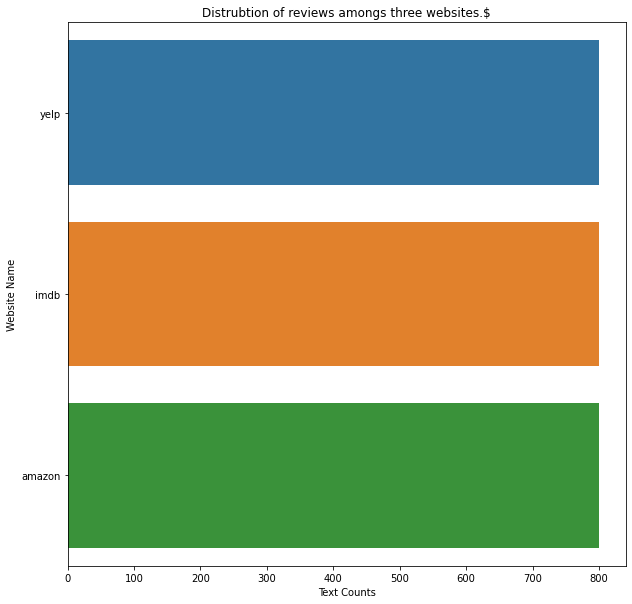

In [28]:
plt.figure(figsize=(10,10))
sns.barplot(x_train['website_name'].value_counts().values[0:15],
           x_train['website_name'].value_counts().index[0:15]);
plt.title("Distrubtion of reviews amongs three websites.$")
plt.xlabel("Text Counts")
plt.ylabel("Website Name")
plt.show()

In [29]:
def decontracted(text):
    # specific
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)

    # general
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

In [30]:
# applying the above decontracted method to the text column of the data
x_train["textCleaned"]=x_train["text"].apply(decontracted)

In [31]:
x_train.head()

,website_name,text,Word Count,Uppercase Char Count,Special Char Count,Digits count,textCleaned
0,amazon,Oh and I forgot to also mention the weird colo...,16,2,1,0,Oh and I forgot to also mention the weird colo...
1,amazon,THAT one didn't work either.,5,4,2,0,THAT one did not work either.
2,amazon,Waste of 13 bucks.,4,1,1,2,Waste of 13 bucks.
3,amazon,"Product is useless, since it does not have eno...",23,2,2,1,"Product is useless, since it does not have eno..."
4,amazon,None of the three sizes they sent with the hea...,15,1,1,0,None of the three sizes they sent with the hea...


In [32]:
import string
# Creating a function for cleaning the column text

def cleanTextColumn(text):
    text= text.lower()  # Making text to lower case
    text = re.sub('r’\d+', '', text)#Removing numbers
    text = text.translate(str.maketrans("","", string.punctuation)) #It removes[!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~]:
    text = re.sub('https?:\/\/\S+|www\.\S+', '', text) # Removing hyperlink 
    text = re.sub(r'[0-9]+','',text) #Reemoving numbers
    text = re.sub('\n', '', text) 
    text = re.sub('\[.*?\]', '', text) #remove text from in suqare brackets
    text =re.sub("^\s+","",text) # remove whitespace from front
    text=re.sub("\s+\Z","",text)# remove whitespace from back
    return text

In [33]:
# applying the above clean text column method to the text column of the data
x_train["textCleaned"]=x_train["textCleaned"].apply(cleanTextColumn)

In [34]:
x_train.tail(10)

,website_name,text,Word Count,Uppercase Char Count,Special Char Count,Digits count,textCleaned
2390,yelp,Food was so gooodd.,4,1,1,0,food was so gooodd
2391,yelp,They have great dinners.,4,1,1,0,they have great dinners
2392,yelp,Best fish I've ever had in my life!,8,2,2,0,best fish i have ever had in my life
2393,yelp,Great brunch spot.,3,1,1,0,great brunch spot
2394,yelp,I don't have very many words to say about this...,17,1,3,0,i do not have very many words to say about thi...
2395,yelp,The sweet potato fries were very good and seas...,10,1,1,0,the sweet potato fries were very good and seas...
2396,yelp,I could eat their bruschetta all day it is dev...,10,1,1,0,i could eat their bruschetta all day it is devine
2397,yelp,Ambience is perfect.,3,1,1,0,ambience is perfect
2398,yelp,We ordered the duck rare and it was pink and t...,21,1,1,0,we ordered the duck rare and it was pink and t...
2399,yelp,Service was good and the company was better!,8,1,1,0,service was good and the company was better


In [35]:
# common words before removing stop words
common_words = pd.Series(' '.join(x_train['textCleaned']).split()).value_counts()[:10]
common_words[:20]

the     1561
and      921
i        808
is       798
a        707
it       617
to       543
of       494
this     494
was      465
dtype: int64

In [36]:
#Reamoving Stop Words
from nltk.corpus import stopwords
# creating a list to not remove not as it might have influence the sentiment
to_remove = ['did', 'not']
new_stopwords = set(stopwords.words('english')).difference(to_remove)

x_train["cleanedTexts"] = x_train["textCleaned"].apply(lambda x: ' '.join([word for word in x.split() if word not in new_stopwords]))


In [37]:
# common words after removing stop words
common_words = pd.Series(' '.join(x_train['cleanedTexts']).split()).value_counts()[:10]
common_words[:20]

not      461
good     184
great    162
movie    142
phone    139
film     124
one      113
would    103
place    100
food      99
dtype: int64

In [38]:
# visulize common and uncommon words here later on

In [39]:
uncommon_words=pd.Series(' '.join(x_train['cleanedTexts']).split()).value_counts()[-20:]
uncommon_words

actions            1
condiment          1
blake              1
miniusb            1
powerful           1
tracfonewebsite    1
elaborately        1
fluffy             1
kits               1
keys               1
boss               1
lc                 1
fiancé             1
psychotic          1
fondue             1
ideal              1
lewis              1
stood              1
subgenre           1
trumbull           1
dtype: int64

In [40]:
tokenized_text = x_train['cleanedTexts'].apply(lambda x: x.split())

In [41]:
tokenized_text

0       [oh, forgot, also, mention, weird, color, effe...
1                           [one, did, not, work, either]
2                                          [waste, bucks]
3       [product, useless, since, not, enough, chargin...
4       [none, three, sizes, sent, headset, would, sta...
                              ...                        
2395         [sweet, potato, fries, good, seasoned, well]
2396                [could, eat, bruschetta, day, devine]
2397                                  [ambience, perfect]
2398    [ordered, duck, rare, pink, tender, inside, ni...
2399                     [service, good, company, better]
Name: cleanedTexts, Length: 2400, dtype: object

In [42]:
x_train.head(5)

,website_name,text,Word Count,Uppercase Char Count,Special Char Count,Digits count,textCleaned,cleanedTexts
0,amazon,Oh and I forgot to also mention the weird colo...,16,2,1,0,oh and i forgot to also mention the weird colo...,oh forgot also mention weird color effect phone
1,amazon,THAT one didn't work either.,5,4,2,0,that one did not work either,one did not work either
2,amazon,Waste of 13 bucks.,4,1,1,2,waste of bucks,waste bucks
3,amazon,"Product is useless, since it does not have eno...",23,2,2,1,product is useless since it does not have enou...,product useless since not enough charging curr...
4,amazon,None of the three sizes they sent with the hea...,15,1,1,0,none of the three sizes they sent with the hea...,none three sizes sent headset would stay ears


In [43]:

from textblob import Word
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized_text =tokenized_text.apply(lambda x:[lemmatizer.lemmatize(word) for word in x])

In [44]:
lemmatized_text

0       [oh, forgot, also, mention, weird, color, effe...
1                           [one, did, not, work, either]
2                                           [waste, buck]
3       [product, useless, since, not, enough, chargin...
4       [none, three, size, sent, headset, would, stay...
                              ...                        
2395           [sweet, potato, fry, good, seasoned, well]
2396                [could, eat, bruschetta, day, devine]
2397                                  [ambience, perfect]
2398    [ordered, duck, rare, pink, tender, inside, ni...
2399                     [service, good, company, better]
Name: cleanedTexts, Length: 2400, dtype: object

In [45]:
#Joining the tokenized tweets
for i in range(len(lemmatized_text)):
    lemmatized_text[i] = ' '.join(lemmatized_text[i])

x_train['tidy_text'] = lemmatized_text

In [46]:
x_train.head(5)

,website_name,text,Word Count,Uppercase Char Count,Special Char Count,Digits count,textCleaned,cleanedTexts,tidy_text
0,amazon,Oh and I forgot to also mention the weird colo...,16,2,1,0,oh and i forgot to also mention the weird colo...,oh forgot also mention weird color effect phone,oh forgot also mention weird color effect phone
1,amazon,THAT one didn't work either.,5,4,2,0,that one did not work either,one did not work either,one did not work either
2,amazon,Waste of 13 bucks.,4,1,1,2,waste of bucks,waste bucks,waste buck
3,amazon,"Product is useless, since it does not have eno...",23,2,2,1,product is useless since it does not have enou...,product useless since not enough charging curr...,product useless since not enough charging curr...
4,amazon,None of the three sizes they sent with the hea...,15,1,1,0,none of the three sizes they sent with the hea...,none three sizes sent headset would stay ears,none three size sent headset would stay ear


In [47]:
# chekcinh uppercase special charcters and digits after cleaning the text column

x_train['Word Count'] = [len(text.split()) for text in x_train['tidy_text']]

x_train['Uppercase Char Count'] = [sum(char.isupper() for char in text) \
                              for text in x_train['tidy_text']]                           

x_train['Special Char Count'] = [sum(char in string.punctuation for char in text) \
                            for text in x_train['tidy_text']]      
x_train['Digits count'] = [sum(c.isdigit() for c in text)\
                            for text in x_train['tidy_text']]

In [48]:
x_train.head(5)

,website_name,text,Word Count,Uppercase Char Count,Special Char Count,Digits count,textCleaned,cleanedTexts,tidy_text
0,amazon,Oh and I forgot to also mention the weird colo...,8,0,0,0,oh and i forgot to also mention the weird colo...,oh forgot also mention weird color effect phone,oh forgot also mention weird color effect phone
1,amazon,THAT one didn't work either.,5,0,0,0,that one did not work either,one did not work either,one did not work either
2,amazon,Waste of 13 bucks.,2,0,0,0,waste of bucks,waste bucks,waste buck
3,amazon,"Product is useless, since it does not have eno...",11,0,0,0,product is useless since it does not have enou...,product useless since not enough charging curr...,product useless since not enough charging curr...
4,amazon,None of the three sizes they sent with the hea...,8,0,0,0,none of the three sizes they sent with the hea...,none three sizes sent headset would stay ears,none three size sent headset would stay ear


# Task 2 – Feature representation

In [49]:
print("Total number of digits present after data preprocessing:" ,x_train['Digits count'].sum())
print("Total number of Special Char present after data preprocessing:",x_train['Special Char Count'].sum())
print("Total number of Upper Char present after data preprocessing:",x_train['Uppercase Char Count'].sum())

Total number of digits present after data preprocessing: 0
Total number of Special Char present after data preprocessing: 0
Total number of Upper Char present after data preprocessing: 0


In [50]:
# Checking unique words before data preprocessing
vectorizer = TfidfVectorizer()
bow = vectorizer.fit_transform(x_train['tidy_text'])
labels = y_train['is_positive_sentiment']
len(vectorizer.get_feature_names())

4101

In [51]:
# function to get ngrams
# https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus,ngram_range, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [52]:
unigrams = get_top_n_words(x_train['text'],(1,1),20)

In [53]:
df_unigrams = pd.DataFrame(unigrams, columns = ['Text' , 'count']) #Creating df

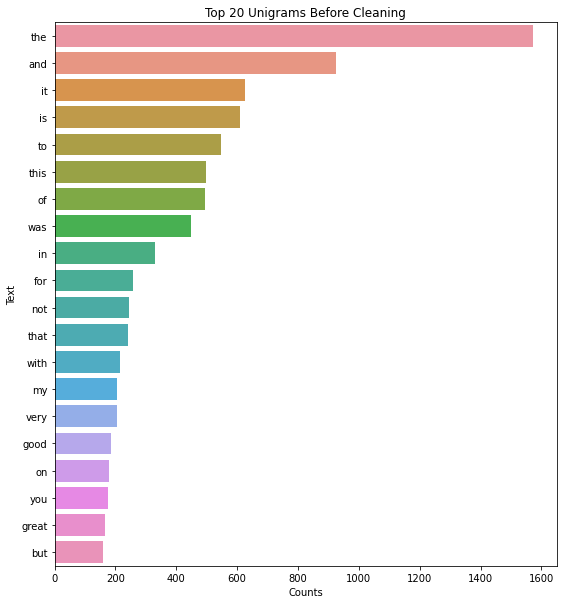

In [54]:
#Plotting top 20 
plt.figure(figsize=(9,10))
sns.barplot(df_unigrams["count"],df_unigrams["Text"])
plt.title("Top 20 Unigrams Before Cleaning")
plt.xlabel("Counts")
plt.ylabel("Text")
plt.show()

In [55]:
unigrams_AC = get_top_n_words(x_train['tidy_text'],(1,1),20)


In [56]:
df_unigrams_AC = pd.DataFrame(unigrams_AC, columns = ['Text' , 'count']) #Creating df

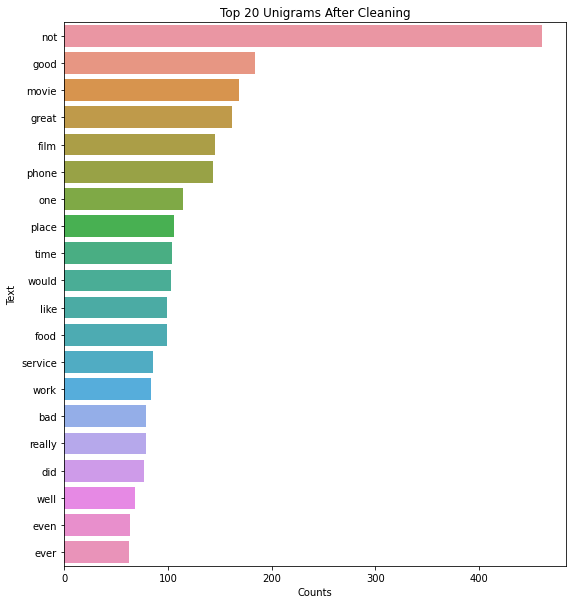

In [57]:
#Plotting top 20 
plt.figure(figsize=(9,10))
sns.barplot(df_unigrams_AC["count"],df_unigrams_AC["Text"])
plt.title("Top 20 Unigrams After Cleaning")
plt.xlabel("Counts")
plt.ylabel("Text")
plt.show()

In [58]:
bigrams = get_top_n_words(x_train['text'],(2,2),20)

In [59]:
df_bigrams = pd.DataFrame(bigrams, columns = ['Text' , 'count']) 

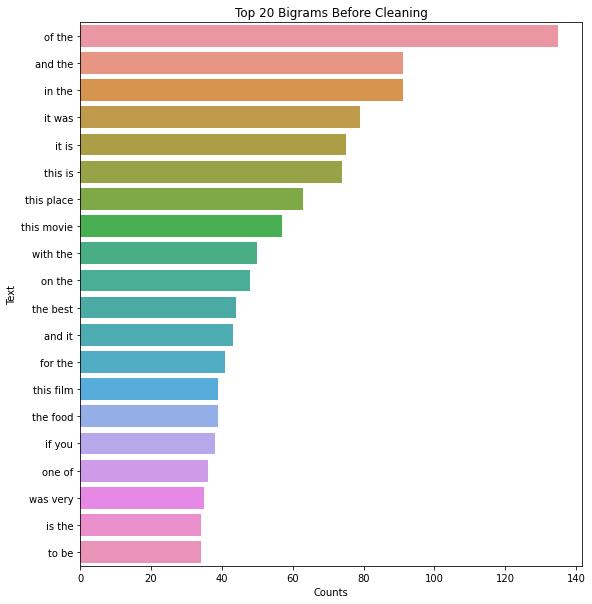

In [60]:
#Plotting top 20 
plt.figure(figsize=(9,10))
sns.barplot(df_bigrams["count"],df_bigrams["Text"])
plt.title("Top 20 Bigrams Before Cleaning")
plt.xlabel("Counts")
plt.ylabel("Text")
plt.show()

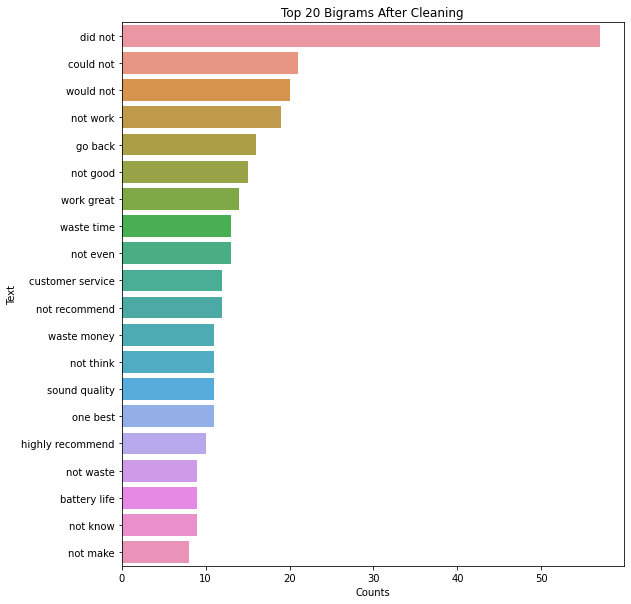

In [61]:
bigrams = get_top_n_words(x_train['tidy_text'],(2,2),20)
df_bigrams = pd.DataFrame(bigrams, columns = ['Text' , 'count']) 
#Plotting top 20 
plt.figure(figsize=(9,10))
sns.barplot(df_bigrams["count"],df_bigrams["Text"])
plt.title("Top 20 Bigrams After Cleaning")
plt.xlabel("Counts")
plt.ylabel("Text")
plt.show()

CPU times: user 1.16 s, sys: 177 ms, total: 1.33 s
Wall time: 1.37 s


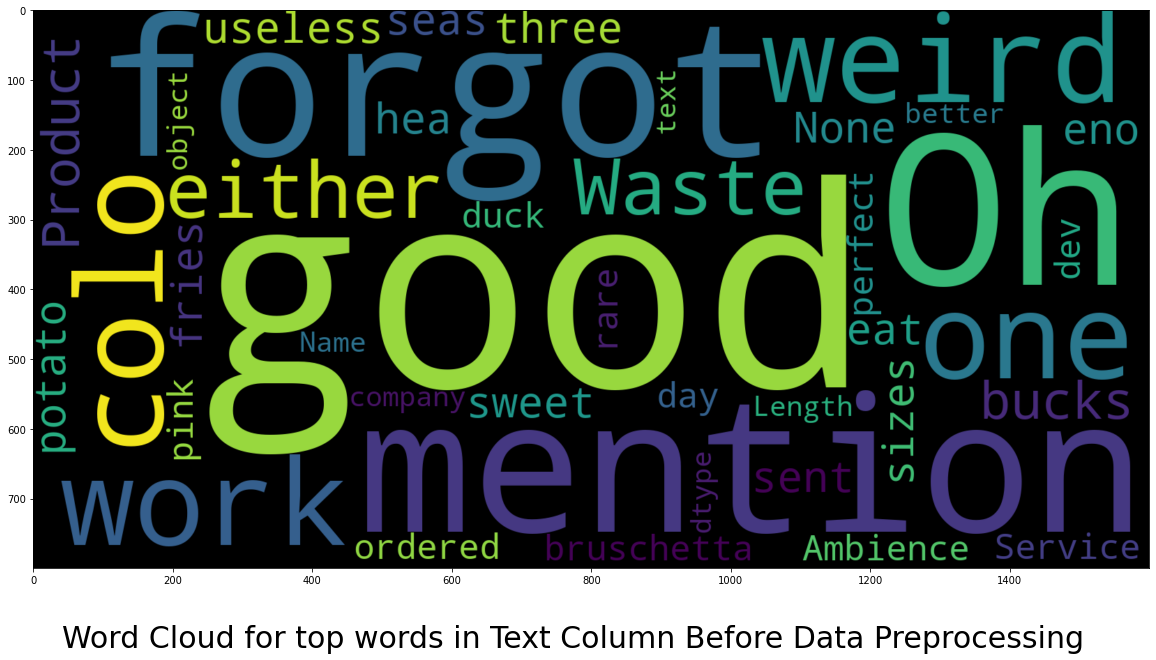

In [63]:
%%time
# Word Cloud for top words in Text Column Before Data Preprocessing

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 50 , width = 1600 , height = 800).generate(str(x_train['text']))
plt.suptitle('Word Cloud for top words in Text Column Before Data Preprocessing', fontsize=30)
plt.subplots_adjust(top=2.3)
plt.imshow(wc , interpolation = 'bilinear')

CPU times: user 1.22 s, sys: 200 ms, total: 1.42 s
Wall time: 1.44 s


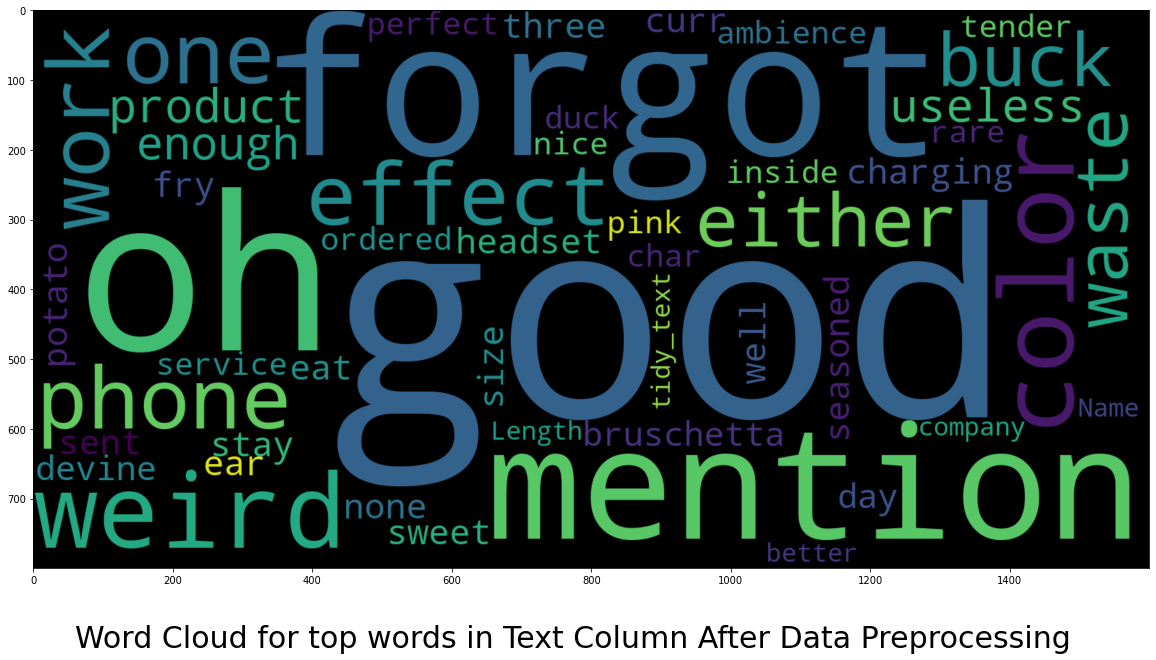

In [65]:
%%time
# word Cloud for top words in Text Column After Data Preprocessing

plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(max_words = 50 , width = 1600 , height = 800).generate(str(x_train['tidy_text']))
plt.suptitle('Word Cloud for top words in Text Column After Data Preprocessing', fontsize=30)
plt.subplots_adjust(top=2.3)
plt.imshow(wc , interpolation = 'bilinear')

In [66]:
# checking unique words after data cleenaing whcich includees 1401 unique words

bow = vectorizer.fit_transform(x_train['tidy_text'])
labels = y_train['is_positive_sentiment']
len(vectorizer.get_feature_names())

4101

# Task 3 – Classification and Evaluation 


In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

X = tfidf_vectorizer.fit_transform(x_train['tidy_text'])
Y= y_train["is_positive_sentiment"]

In [72]:
# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report
# for cross validation value fold
X_train_set = X
y_train_set= Y


In [73]:
classifier =MultinomialNB()
from sklearn.model_selection import cross_val_score
# testing cv with 3 folds
all_accuracies = cross_val_score(estimator=classifier, X=X_train_set, y=y_train_set, cv=3)

In [74]:
# metrics of cv with 3 folds
print("The accuracy score of all 3 folds: ",all_accuracies)
print("Avearge of all 3 accuarcys core: ",all_accuracies.mean())
print("Standard Deviation of all accuracies: ",all_accuracies.std())

The accuracy score of all 3 folds:  [0.76375 0.72    0.76125]
Avearge of all 3 accuarcys core:  0.7483333333333334
Standard Deviation of all accuracies:  0.02006067186201789


In [75]:
# testing cv with 5 folds
all_accuracies = cross_val_score(estimator=classifier, X=X_train_set, y=y_train_set, cv=5)

In [76]:
# metrics of cv with 5 folds
print("The accuracy score of all 5 folds: ",all_accuracies)
print("Avearge of all 5 accuarcys core: ",all_accuracies.mean())
print("Standard Deviation of all accuracies: ",all_accuracies.std())

The accuracy score of all 5 folds:  [0.8        0.78541667 0.77916667 0.78541667 0.83125   ]
Avearge of all 5 accuarcys core:  0.79625
Standard Deviation of all accuracies:  0.018791620472966154


In [77]:
# testing cv with 6 folds
all_accuracies = cross_val_score(estimator=classifier, X=X_train_set, y=y_train_set, cv=6)

In [78]:
# metrics of cv with 6 folds
print("The accuracy score of all 6 folds: ",all_accuracies)
print("Avearge of all 6 accuarcys core: ",all_accuracies.mean())
print("Standard Deviation of all accuracies: ",all_accuracies.std())

The accuracy score of all 6 folds:  [0.8075 0.805  0.7725 0.7675 0.78   0.845 ]
Avearge of all 6 accuarcys core:  0.79625
Standard Deviation of all accuracies:  0.02656556354882514


In [79]:

X = x_train['tidy_text']
Y= y_train["is_positive_sentiment"]

In [81]:
# splitting the data into traininga and valistaion set
X_train_set, validation_set, y_train_set, y_validation_set = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [82]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()

In [83]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', BernoulliNB())])
                     
tuned_parameters = {
    'tfidf__min_df': (1,5,10,15),
    'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2),(1,3),(3,3)],
    'tfidf__use_idf': (True, False),
    'clf__alpha': [0.01, 0.1, 0.5, 0.6,1.0, 10.0]
}

In [84]:
%%time
from sklearn.model_selection import GridSearchCV
gridSearch_bNB = GridSearchCV(text_clf, tuned_parameters,scoring='balanced_accuracy',return_train_score=True, cv=5)
gridSearch_bNB.fit(X_train_set, y_train_set)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: After pruning, no terms remain. Try a lower min_df or a higher max_df.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: After pruning, no terms remain. Try a lower min_df or a higher max_df.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: After pruning, no terms remain. Try a lower min_df or a higher max_df.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-pac

CPU times: user 1min 7s, sys: 795 ms, total: 1min 8s
Wall time: 1min 12s


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        n

In [85]:
# Accaurcy of BernoulliNB classifier and its best parameters

print('Train Accuracy of : %.3f'%gridSearch_bNB.best_estimator_.score( X_train_set, y_train_set))
print('Test Accuracy : %.3f'%gridSearch_bNB.best_estimator_.score( validation_set, y_validation_set))
print('Best Accuracy Through Grid Search : %.3f'%gridSearch_bNB.best_score_)
print('Best Parameters : ',gridSearch_bNB.best_params_)

Train Accuracy of : 0.984
Test Accuracy : 0.830
Best Accuracy Through Grid Search : 0.812
Best Parameters :  {'clf__alpha': 1.0, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2), 'tfidf__use_idf': True}


In [86]:

# classifcation report of BernoulliNB classifier
predictions_bNB = gridSearch_bNB.predict(validation_set)
print (classification_report(y_validation_set, predictions_bNB))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       290
           1       0.85      0.81      0.83       310

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.83      0.83       600



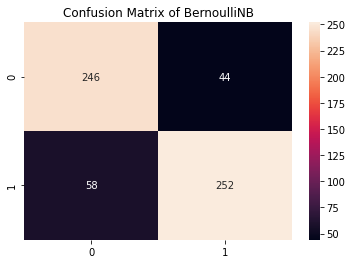

In [87]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


plt.title("Confusion Matrix of BernoulliNB")
sns.heatmap(confusion_matrix(y_validation_set, predictions_bNB), fmt="d",annot = True)

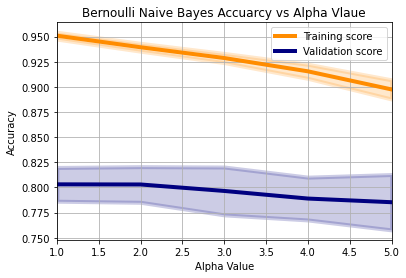

In [88]:
# plotting of alpha value of bernoulli Naive bayes vs accuarcy core

from sklearn.model_selection import validation_curve
param_range =[1,2,3,4,5]
train_scores, test_scores = validation_curve(
    BernoulliNB(), vectorizer.fit_transform(X_train_set),y_train_set, param_name="alpha", param_range=param_range,
    scoring="balanced_accuracy",cv=5, n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Bernoulli Naive Bayes Accuarcy vs Alpha Vlaue")
plt.xlabel("Alpha Value")
plt.ylabel("Accuracy")
plt.ticklabel_format(style='plain')
# plt.ylim(0.01, 10.0)
plt.xlim(1,5)
lw = 4
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.grid()
plt.show()

In [89]:
# parameters of multonomial
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB())])


tuned_parameters = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__min_df': (1,5,10,15),
    'clf__alpha': [0.01, 0.1, 0.5, 0.6,1.0, 10.0]
}

In [90]:
%%time
from sklearn.model_selection import GridSearchCV
gridSearch_NB = GridSearchCV(text_clf, tuned_parameters,scoring='balanced_accuracy',return_train_score=True, cv=5,refit=True)
gridSearch_NB.fit(X_train_set, y_train_set)

CPU times: user 17.6 s, sys: 96.3 ms, total: 17.7 s
Wall time: 17.8 s


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        n

In [91]:
# Accaurcy of MultinomialNB classifier and its best parameters


print('Train Accuracy of : %.3f'%gridSearch_NB.best_estimator_.score( X_train_set, y_train_set))
print('Test Accuracy : %.3f'%gridSearch_NB.best_estimator_.score( validation_set, y_validation_set))
print('Best Accuracy Through Grid Search : %.3f'%gridSearch_NB.best_score_)
print('Best Parameters : ',gridSearch_NB.best_params_)

Train Accuracy of : 0.994
Test Accuracy : 0.837
Best Accuracy Through Grid Search : 0.819
Best Parameters :  {'clf__alpha': 0.5, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2)}


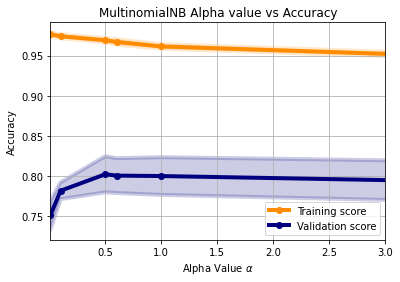

In [92]:
# plot of Multinomial classifier alpha value vs Accaurcy score

from sklearn.model_selection import validation_curve
# param_range = np.logspace(-6, -1, 5)
param_range =[0.01, 0.1, 0.5, 0.6,1.0, 10.0]
train_scores, test_scores = validation_curve(
    MultinomialNB(), vectorizer.fit_transform(X_train_set),y_train_set, param_name="alpha", param_range=param_range,
    scoring="balanced_accuracy",cv=5, n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("MultinomialNB Alpha value vs Accuracy")
plt.xlabel(r"Alpha Value $\alpha$")
plt.ylabel("Accuracy")
plt.ticklabel_format(style='plain')
# plt.ylim(0.01, 10.0)
plt.xlim(0.01, 3)
lw = 4
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange",marker='o', lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Validation score",
             color="navy",marker='o', lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.grid()
plt.show()


In [93]:
# classifcation report of MultinomialNB classifier
predictions_NB = gridSearch_NB.predict(validation_set)
print (classification_report(y_validation_set, predictions_NB))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       290
           1       0.84      0.84      0.84       310

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600



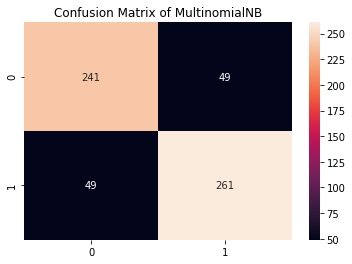

In [94]:

plt.title("Confusion Matrix of MultinomialNB")
sns.heatmap(confusion_matrix(y_validation_set, predictions_NB), fmt="d",annot = True)

In [95]:
optimized_classifier=gridSearch_NB.best_estimator_
optimized_classifier.fit(X_train_set,y_train_set)

optimized_classifier.score(validation_set,y_validation_set)

0.8366666666666667

# # Testing classifier MultinomialNB on Reviews from Amazon, yelp and imdb.


In [96]:

Amazon=x_train["tidy_text"][0:800]
Amazon_y=y_train["is_positive_sentiment"][0:800]


In [97]:
predictionsAmazon=optimized_classifier.predict(Amazon)

print (classification_report(Amazon_y, predictionsAmazon))



              precision    recall  f1-score   support

           0       0.96      0.96      0.96       400
           1       0.96      0.96      0.96       400

    accuracy                           0.96       800
   macro avg       0.96      0.96      0.96       800
weighted avg       0.96      0.96      0.96       800



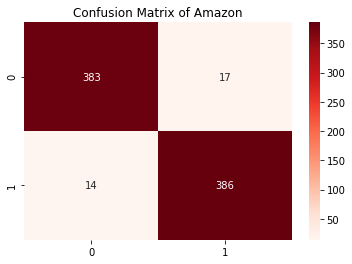

In [98]:
plt.title("Confusion Matrix of Amazon")
sns.heatmap(confusion_matrix(Amazon_y, predictionsAmazon), fmt="d",cmap='Reds',annot = True)

In [99]:
imdb=x_train["tidy_text"][800:1600]
imdb_y=y_train["is_positive_sentiment"][800:1600]

In [100]:
predictions_imdb=optimized_classifier.predict(imdb)

print (classification_report(imdb_y, predictions_imdb))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       400
           1       0.95      0.94      0.95       400

    accuracy                           0.95       800
   macro avg       0.95      0.95      0.95       800
weighted avg       0.95      0.95      0.95       800



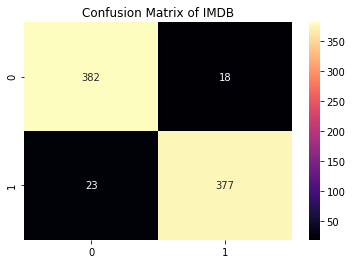

In [101]:
plt.title("Confusion Matrix of IMDB")
sns.heatmap(confusion_matrix(imdb_y, predictions_imdb), fmt="d",cmap='magma',annot = True)

In [102]:
yelp=x_train["tidy_text"][1600:2400]
yelp_y=y_train["is_positive_sentiment"][1600:2400]

In [103]:
predictions_yelp=optimized_classifier.predict(yelp)

print (classification_report(yelp_y, predictions_yelp))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       400
           1       0.96      0.95      0.95       400

    accuracy                           0.95       800
   macro avg       0.96      0.95      0.95       800
weighted avg       0.96      0.95      0.95       800



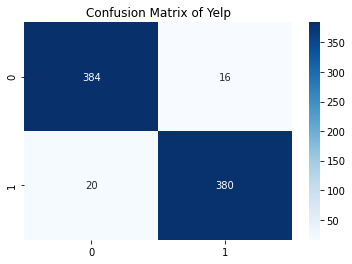

In [104]:
plt.title("Confusion Matrix of Yelp")
sns.heatmap(confusion_matrix(yelp_y, predictions_yelp), fmt="d",cmap='Blues',annot = True)

In [105]:
optimized_classifier.fit(X,Y)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True))],
         verbose=False)

# # Testing Multinomial NB on some sentences

In [106]:
# slighly negative and postive sentence
short_negative_sentence = (["The movie is terribly boring in places."])
short_positive_sentence = (["Highly entertaining at all angles.  "])

print("short Negtaive sentence :",optimized_classifier.predict_proba(short_negative_sentence))
print("short Postive sentence :",optimized_classifier.predict_proba(short_positive_sentence))

short Negtaive sentence : [[0.73718055 0.26281945]]
short Postive sentence : [[0.16548392 0.83451608]]


In [107]:
# long sentence test  for postive and negative sttaments.
our_negative_sentence = (['The one big drawback of the MP3 player is that the buttons on the phones\
                          front cover that let you pause and skip songs lock out after a few seconds.he worst phone from samsung...crap..... \
                          this crappy Samsung E715..\
                          is the worst i have ever seeen.'])
our_positive_sentence = (['this case is of exceptional quality and well worth the additional costs of owning an official OEM product.The were excellent The staff was very attentive.Highly recommended.The shrimp tender and moist.'])

print("Long Negtaive sentence :",optimized_classifier.predict_proba(our_negative_sentence))
print("Long Postive sentence :",optimized_classifier.predict_proba(our_positive_sentence))







Long Negtaive sentence : [[0.86328875 0.13671125]]
Long Postive sentence : [[0.18222489 0.81777511]]


In [108]:
our_slightly_negative_sentence = (["The product was okay. \
I've ordered better in the past, and overall, I'd probably recommend a different \
product line if you're new to these. The company is good, though, and they do \
have some excellent products. This product isn't really one of them."])

our_slightly_positive_sentence = (["I must say this product is incredible bang for your \
buck. It's pretty good, and you'd be hard pressed to find something similar for \
this thing's low cost."])

print("Slightly Negtaive sentence :",optimized_classifier.predict_proba(our_slightly_negative_sentence))
print("Slightly Postive sentence :",optimized_classifier.predict_proba(our_slightly_positive_sentence))

Slightly Negtaive sentence : [[0.29437294 0.70562706]]
Slightly Postive sentence : [[0.31432816 0.68567184]]


### linear SVM classifier

In [109]:
from sklearn.svm import LinearSVC
 
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC())])


tuned_parameters = {
    'tfidf__min_df': (1,5,10,15), 
    'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'clf__C': [1,2,3,4,5]
}
   

In [110]:
%%time
from sklearn.model_selection import GridSearchCV
gridSearch_SVM = GridSearchCV(text_clf, tuned_parameters,scoring='balanced_accuracy',return_train_score=True, cv=5,refit=True)
gridSearch_SVM.fit(X_train_set, y_train_set)

CPU times: user 17.7 s, sys: 150 ms, total: 17.9 s
Wall time: 18.1 s


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        n

In [111]:
# SVM classifier best parameters
print('Train Accuracy of : %.3f'%gridSearch_SVM.best_estimator_.score( X_train_set, y_train_set))
print('Test Accuracy : %.3f'%gridSearch_SVM.best_estimator_.score( validation_set, y_validation_set))
print('Best Accuracy Through Grid Search : %.3f'%gridSearch_SVM.best_score_)
print('Best Parameters : ',gridSearch_SVM.best_params_)

Train Accuracy of : 1.000
Test Accuracy : 0.835
Best Accuracy Through Grid Search : 0.815
Best Parameters :  {'clf__C': 3, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2)}


In [112]:
predictionsSVM = gridSearch_SVM.predict(validation_set)
print (classification_report(y_validation_set, predictionsSVM))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       290
           1       0.84      0.84      0.84       310

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.84      0.83      0.84       600



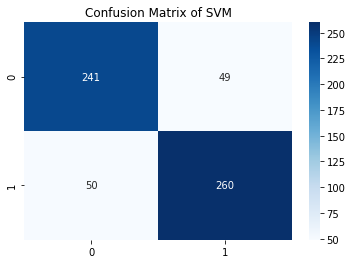

In [113]:

plt.title("Confusion Matrix of SVM")
sns.heatmap(confusion_matrix(y_validation_set, predictionsSVM), fmt="d",cmap='Blues',annot = True)

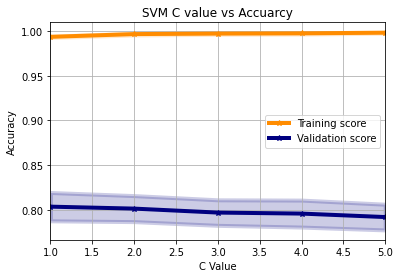

In [114]:
param_range =[1,2,3,4,5]
train_scores, test_scores = validation_curve(
    LinearSVC(), vectorizer.fit_transform(X_train_set),y_train_set, param_name="C", param_range=param_range,
    scoring="balanced_accuracy",cv=5, n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("SVM C value vs Accuarcy")
plt.xlabel("C Value")
plt.ylabel("Accuracy")
plt.ticklabel_format(style='plain')
# plt.ylim(0.01, 10.0)
plt.xlim(1,5)
lw = 4
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange",marker='*' ,lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Validation score",
             color="navy", marker='*', lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy",lw=lw)
plt.legend(loc="best")
plt.grid()
plt.show()


In [115]:
optimized_classifier=gridSearch_SVM.best_estimator_
optimized_classifier.fit(X_train_set,y_train_set)

optimized_classifier.score(validation_set,y_validation_set)

0.835

In [117]:
# testing the Multnomial classifier on test data

predictionsTest = gridSearch_NB.predict(x_test["text"])
print (classification_report(y_test, predictionsTest))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       300
           1       0.85      0.75      0.79       300

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600



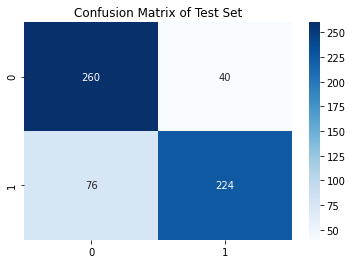

In [118]:
plt.title("Confusion Matrix of Test Set")
sns.heatmap(confusion_matrix(y_test, predictionsTest), fmt="d",cmap='Blues',annot = True)